In [1]:
# 风险及免责提示：该策略由聚宽用户在聚宽社区分享，仅供学习交流使用。
# 原文一般包含策略说明，如有疑问请到原文和作者交流讨论。
# 原文网址：https://www.joinquant.com/view/community/detail/34850
# 标题：大盘拥挤率极速版-180天3秒

from jqdata import *
import datetime
import pandas as pd

In [2]:
# date_now的过去180天
date_now = datetime.date(2021, 3, 12)
days = 180

CPU times: user 1min 26s, sys: 293 ms, total: 1min 27s
Wall time: 1min 28s


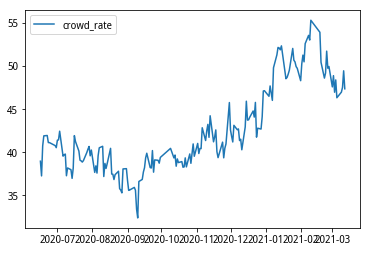

In [3]:
%%time
# ---------------------
# 2021-4 第一版
# ---------------------
dict_crowd = {}
trade_days = get_trade_days(end_date=date_now, count=days)
for date1 in trade_days:
    all_stocks = list(get_all_securities(date=date1).index)
    h = get_price(all_stocks, end_date=date1, frequency='1d', fields='money',
                  count=1, panel=False).sort_values(by='money', ascending=False)
    #
    n_five_pct = int(len(h) / 20)   # 5%
    n_crowd = h.iloc[:n_five_pct]['money'].sum() / h['money'].sum()
    dict_crowd[date1] = n_crowd * 100
#
df_crowd = pd.DataFrame.from_dict(dict_crowd, orient='index',columns=['crowd_rate',])
df_crowd.plot()

In [6]:
df_crowd[df_crowd.crowd_rate>=55]

,crowd_rate
2021-02-10,55.321095


In [7]:
df_crowd[df_crowd.crowd_rate<=33]

,crowd_rate
2020-09-10,32.388364


CPU times: user 3.03 s, sys: 28 ms, total: 3.05 s
Wall time: 3.18 s


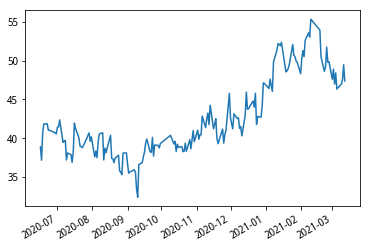

In [11]:
%%time
# ---------------------
# 2021-10-6 新版
# ---------------------
trade_day = get_trade_days(end_date=date_now, count=1)[-1]
all_stocks = list(get_all_securities(date=trade_day).index)

h = get_price(all_stocks, end_date=trade_day, frequency='1d', fields='money',
                  count=days, panel=False
             ).pivot(index='code',columns='time',values='money')
#
dict_crowd = {}
for day in h.columns:
    s2 = h[day].dropna().sort_values(ascending=False)
    dict_crowd[day] = (100 * s2.iloc[:len(s2)//20].sum()) / s2.sum()
#
s_crowd = pd.Series(dict_crowd)
s_crowd.plot()

In [12]:
s_crowd[s_crowd>=55]

2021-02-10    55.321198
dtype: float64

In [13]:
s_crowd[s_crowd<=33]

2020-09-10    32.393107
dtype: float64